#### Scikit-learn is a very popular Machine Learning library for Python. In this kernel let us use it to build a machine learning model using k-Nearest Neighbors algorithm to predict whether the patients in the "Pima Indians Diabetes Dataset" have diabetes or not.

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
df = pd.read_csv(r'E:\InnoDaat\KNN_proejct\diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [114]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [115]:
df.shape

(768, 9)

In [116]:
X = df.drop('Outcome',axis=1)
y = df['Outcome']

In [119]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=50)

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=20)

kreg = KNeighborsClassifier(n_neighbors=3)
kreg.fit(X_train,y_train)
print('Accuracy :',kreg.score(X_train,y_train))

Accuracy : 0.8631921824104235


In [120]:
print(X_train.shape,y_test.shape)

(614, 8) (154,)


In [121]:
##### I get the 86% accuracy score for pred/test.
from sklearn.metrics import confusion_matrix
y_pred = kreg.predict(X_test)
print("y_test    y_pred")
for i in range(len(y_pred)):
    print(y_pred[i], '\t ',np.array(y_test)[i])


y_test    y_pred
1 	  1
1 	  1
0 	  0
0 	  0
0 	  0
0 	  1
1 	  1
1 	  0
0 	  0
0 	  0
1 	  1
0 	  0
1 	  0
0 	  0
0 	  0
0 	  0
0 	  0
1 	  0
0 	  0
1 	  0
0 	  0
0 	  1
0 	  0
0 	  0
1 	  1
0 	  0
1 	  0
0 	  0
1 	  1
1 	  1
1 	  1
0 	  1
1 	  1
0 	  0
0 	  1
1 	  1
1 	  0
0 	  0
0 	  0
1 	  0
1 	  0
0 	  0
0 	  1
0 	  0
0 	  0
0 	  1
0 	  0
0 	  0
0 	  1
1 	  0
1 	  1
0 	  0
1 	  0
1 	  1
1 	  1
0 	  0
0 	  0
1 	  0
0 	  0
0 	  1
1 	  0
0 	  0
0 	  0
0 	  1
0 	  0
1 	  1
0 	  0
0 	  0
0 	  0
1 	  1
0 	  0
1 	  0
0 	  0
0 	  0
1 	  1
1 	  0
1 	  0
1 	  1
0 	  1
0 	  0
0 	  1
0 	  0
0 	  1
1 	  1
0 	  1
1 	  0
0 	  0
0 	  0
1 	  0
1 	  1
0 	  1
0 	  1
0 	  1
1 	  0
1 	  0
0 	  0
0 	  0
0 	  0
0 	  0
0 	  0
0 	  0
0 	  1
0 	  0
1 	  0
0 	  0
0 	  0
0 	  1
1 	  1
0 	  0
0 	  0
0 	  0
1 	  1
1 	  1
1 	  1
0 	  0
0 	  0
0 	  0
1 	  1
0 	  0
0 	  0
1 	  0
0 	  1
0 	  0
0 	  0
0 	  0
1 	  0
1 	  1
0 	  0
0 	  0
0 	  0
0 	  1
0 	  1
0 	  0
0 	  1
1 	  1
1 	  1
0 	  0
0 	  0
0 	  0
0 	  0
0 	

In [122]:
confusion_matrix(y_test,y_pred)

array([[77, 24],
       [24, 29]], dtype=int64)

In [123]:
df.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1


### We want to predict if some full fill the below mentioned tech.
    Pregnancies : 7
    Glucose : 138
    BlooPressure : 75
    SKinThickness: 31
    Insulin : 0
    BMI : 32.9
    Diabetes : 0.543
    Age : 48

In [124]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

UserPredict = kreg.predict([[7,138,75,31,0,32.9,0.543,48]])
print("According to the data, Diabetes may be or not in the user : 86% chance yes/No [1,0] : ",UserPredict[0])

              precision    recall  f1-score   support

           0       0.76      0.76      0.76       101
           1       0.55      0.55      0.55        53

    accuracy                           0.69       154
   macro avg       0.65      0.65      0.65       154
weighted avg       0.69      0.69      0.69       154

According to the data, Diabetes may be or not in the user : 86% chance yes/No [1,0] :  1


### ROC (Reciever Operating Charecteristic) curve
### Two diagnostic tools that help in the interpretation of probabilistic forecast for binary (two-class) classification predictive modeling problems are ROC Curves and Precision-Recall curves.
    In this tutorial, you will discover ROC Curves, Precision-Recall Curves, and when to use each to interpret the prediction of probabilities for binary classification problems.
    After completing this tutorial, you will know:
    > ROC Curves summarize the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds.
       : Precision-Recall curves summarize the trade-off between the true positive rate and the positive predictive value for a predictive model using different probability thresholds.
      : ROC curves are appropriate when the observations are balanced between each class, whereas precision-recall curves are appropriate for imbalanced datasets.

In [125]:
from sklearn.metrics import roc_curve
kreg_pred_proba = kreg.predict_proba(X_test)[:,1]
fpr , tpr, thresold = roc_curve(y_test,kreg_pred_proba)

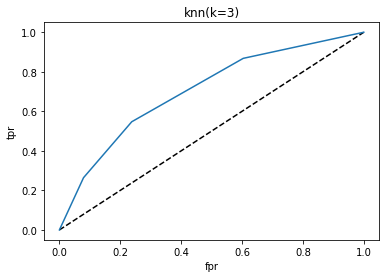

In [126]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('knn(k=3)')
plt.show()

In [127]:
# area of ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,kreg_pred_proba)


0.7038109471324492

# Cross Validation 

#### the training performance totally depend on the who percentage data split in the model. 
    Tehcnique:
        1. K-fold cross validation technique.
            process :  1. we have to shuffle the dataset randomly.
                       2. split dataset into K groups.
            This approach involves randomly dividing the set of observations into k groups, or folds, of approximately equal size. The first fold is treated as a validation set, and the method is fit on the remaining k − 1 folds.

# Technique use like : GridSearchCV

In [130]:
from sklearn.model_selection import GridSearchCV

# Tunning a N-neighbour.
#param_grid = np.arange(1,50)
param_grid = {'n_neighbors':np.arange(1,30)}
# K-Neighbors calling
knn = KNeighborsClassifier()
knn_cv  = GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

print(knn_cv.best_score_,',',knn_cv.best_params_)

0.7578558696205755 , {'n_neighbors': 14}


#### Thus a knn classifier with number of neighbors as 14 achieves the best score/accuracy of 0.7578 i.e about 76%